[Reference](https://anmol3015.medium.com/customize-your-matplotlib-plots-in-python-54726f414602)

# The Dataset

In [1]:
import plotly.express as px
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [2]:
# read the data for 2007
df_2007 = df.loc[df['year']==2007]
df_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


# Life Expectancy vs GPD per capita — The Plot

## 1. Creating the plot

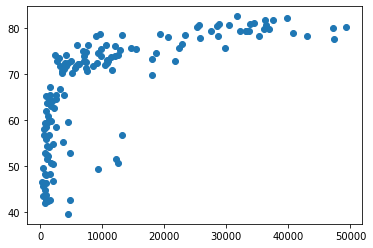

In [4]:
#import the matplotlib package 
import matplotlib.pyplot as plt

# find the relationship between GDP per cap and lifeExp
plt.scatter(df_2007['gdpPercap'], df_2007['lifeExp'])
plt.show()

## 2. Add the axis titles and the chart title

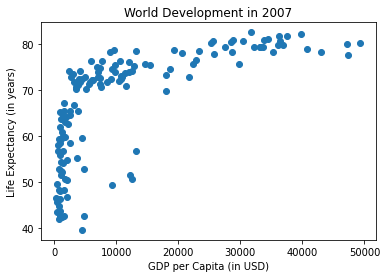

In [5]:
plt.scatter(df_2007['gdpPercap'], df_2007['lifeExp'])

# Add the axis titles and the chart title
plt.xlabel('GDP per Capita (in USD)')
plt.ylabel('Life Expectancy (in years)')
plt.title('World Development in 2007')

plt.show()

## 3. Transform the x-axis

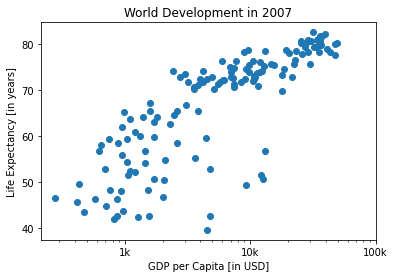

In [6]:
plt.scatter(df_2007['gdpPercap'],df_2007['lifeExp'])
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')

# transform x-axis scale
plt.xscale('log')
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

plt.xticks(tick_val, tick_lab)

plt.show()

## 4. Size of the Countries

In [7]:
#calculating the size of the bubbles/countries based on the population
size = df_2007['pop']
size = size/1000000
size

11      31.889923
23       3.600523
35      33.333216
47      12.420476
59      40.301927
          ...    
1655    85.262356
1667     4.018332
1679    22.211743
1691    11.746035
1703    12.311143
Name: pop, Length: 142, dtype: float64

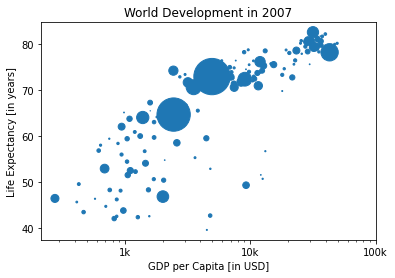

In [8]:
plt.scatter(df_2007['gdpPercap'],df_2007['lifeExp'], s = size)
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
# transform x-axis scale
plt.xscale('log')

tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

plt.xticks(tick_val, tick_lab)

plt.show()

## 5. Add color to represent the Continents

In [10]:
import pandas as pd

In [11]:
# finding the continents in our dataset
df_2007['continent'].unique()
# Creating a new dataframe for the color and continent mapping 
color = pd.DataFrame({'continent':['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'],'color':['red', 'green', 'blue', 'yellow', 'black']})

# merging the color dataframe 
df_2007 = pd.merge(df_2007, color, on = ['continent'], how = 'inner')
df_2007

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,color
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,red
1,Bahrain,Asia,2007,75.635,708573,29796.048340,BHR,48,red
2,Bangladesh,Asia,2007,64.062,150448339,1391.253792,BGD,50,red
3,Cambodia,Asia,2007,59.723,14131858,1713.778686,KHM,116,red
4,China,Asia,2007,72.961,1318683096,4959.114854,CHN,156,red
...,...,...,...,...,...,...,...,...,...
137,United States,Americas,2007,78.242,301139947,42951.653090,USA,840,yellow
138,Uruguay,Americas,2007,76.384,3447496,10611.462990,URY,858,yellow
139,Venezuela,Americas,2007,73.747,26084662,11415.805690,VEN,862,yellow
140,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36,black


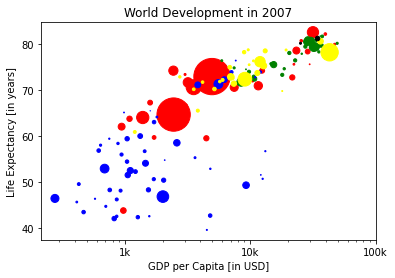

In [12]:
size = df_2007['pop']
size = size/1000000

plt.scatter(df_2007['gdpPercap'],df_2007['lifeExp'],
              s = size, c = df_2007['color'] )

plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xscale('log')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']

plt.xticks(tick_val,tick_lab)

plt.show()

## 7. Adding the name of India and China to our plot

In [13]:
# Let's look at the life expectancy and GDP per capita for India and China 
df_2007.loc[df_2007['country'].isin(['India','China'])]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,color
4,China,Asia,2007,72.961,1318683096,4959.114854,CHN,156,red
6,India,Asia,2007,64.698,1110396331,2452.210407,IND,356,red


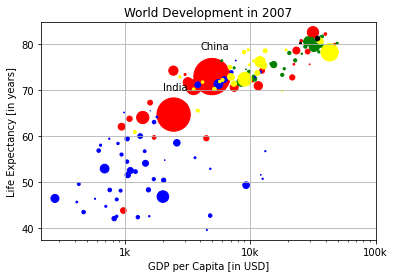

In [15]:
# final code 
size = df_2007['pop']
size = size/1000000

plt.scatter(df_2007['gdpPercap'],df_2007['lifeExp'], s = size, c = df_2007['color'] )

plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xscale('log')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']

plt.xticks(tick_val,tick_lab)

# Additional customizations - add country labels 
plt.text(2000,70,'India')
plt.text(4000,79,'China')

# Add grid() 
plt.grid(True)

plt.show()

## 8. Bonus: Adding legends

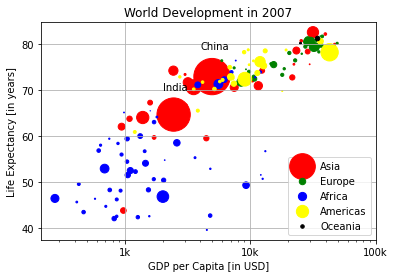

In [17]:
# Creating subplots for each of the colors 
fig, ax = plt.subplots()

# setting legend using the label argument within scatter function
for color in df_2007['color'].unique():
    # filter the data corresponding to the color  
    df_2007_new=df_2007.loc[df_2007['color']==color]
    size = df_2007_new['pop']
    size = size/1000000
    plt.scatter(df_2007_new['gdpPercap'],df_2007_new['lifeExp'], 
    s = size, c = color,label=df_2007_new['continent'].unique()[0])
    
# position of the legend 
ax.legend(loc="lower right")

plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xscale('log')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']

plt.xticks(tick_val,tick_lab)

# Additional customizations - add country labels 
plt.text(2000,70,'India')
plt.text(4000,79,'China')

# Add grid() 
plt.grid(True)

plt.show()